In [1]:
import torch
import sys
from torch import nn
from torch.utils.data import DataLoader
from torch import optim
from torchvision import datasets, transforms
from tqdm import tqdm
import os
import numpy as np
from torchsummary import summary
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import HTML

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DnnSecurity/Attack/BadNet')
from dataset_cifar import MyDataset
from model import WideResNet

In [ ]:
# Prepare Env
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

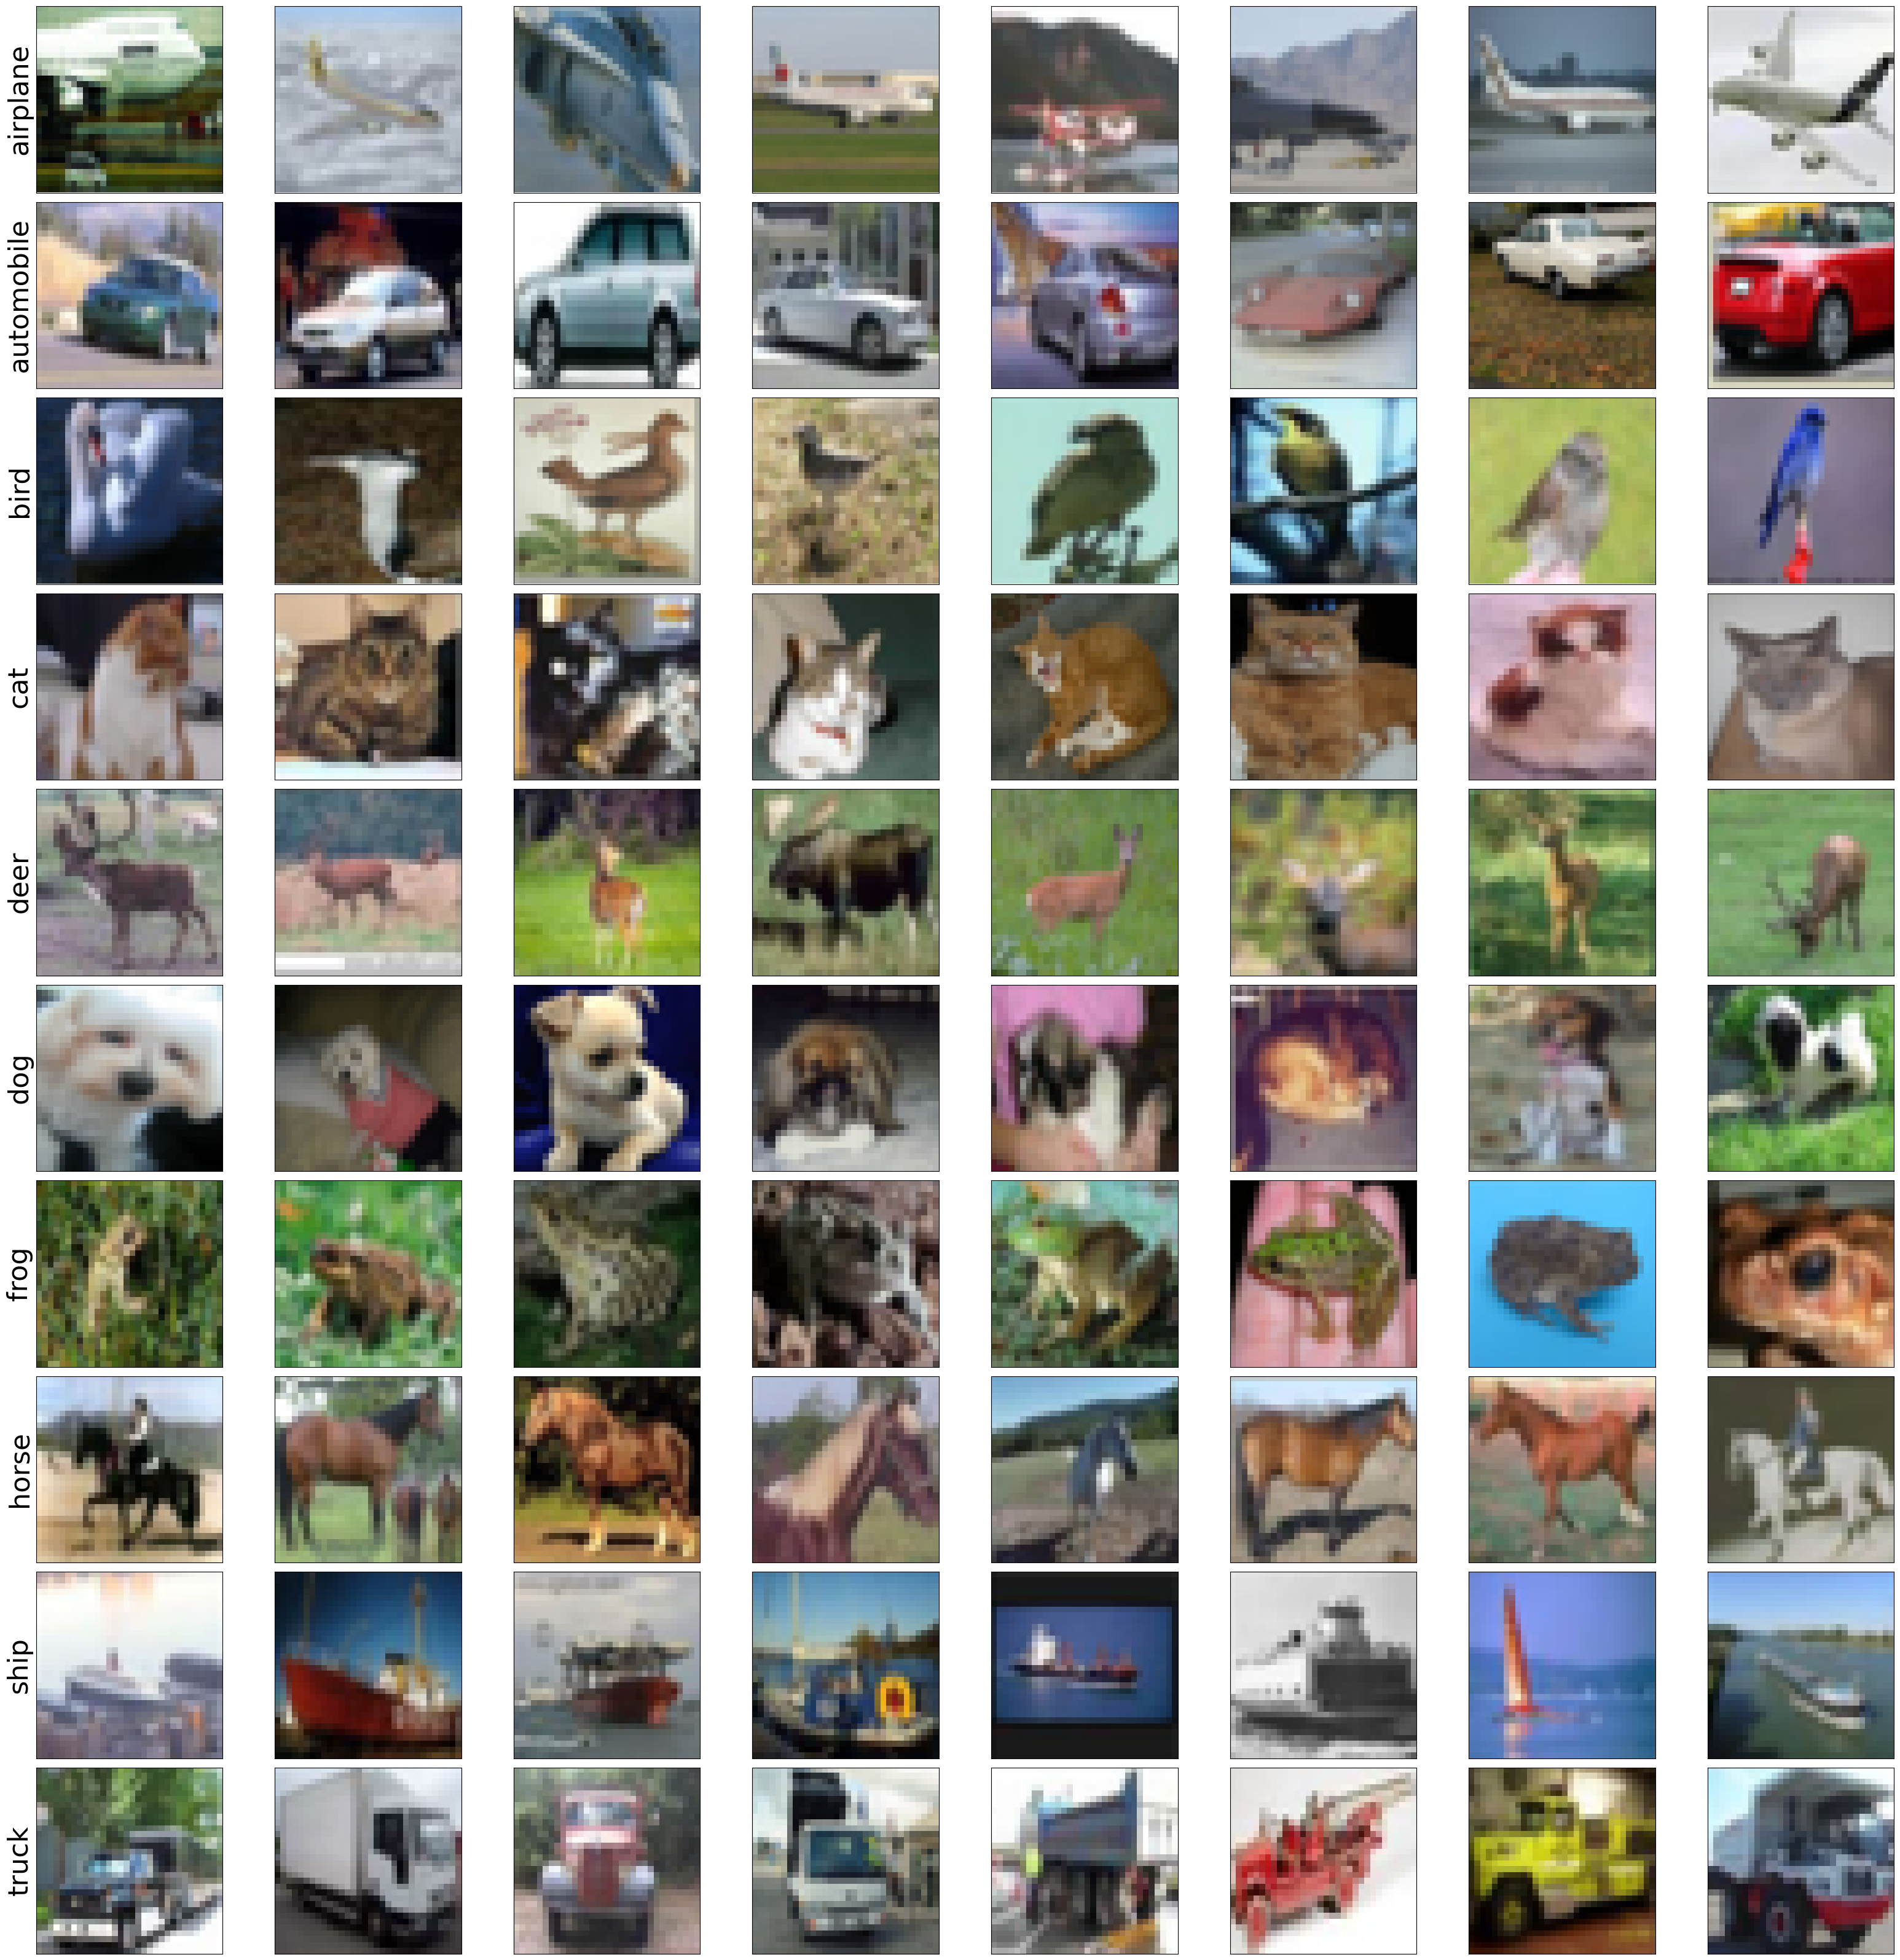

"\ntransform = transforms.Compose([transforms.ToTensor()])\n\ntrain_data_samples = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)\n\nclass_names = train_data_samples.classes\nsamples_per_class = 8\n\ntrain_loader = DataLoader(train_data_samples, batch_size=len(train_data_samples), shuffle=True)\n\ndata_iter = iter(train_loader)\nimages, labels = next(data_iter)\n\nplt.figure(figsize=(32, 32))\n\nfor class_idx, class_name in enumerate(class_names):\n    class_indices = [i for i, label in enumerate(labels) if label == class_idx]\n\n    chosen_indices = random.sample(class_indices, samples_per_class)\n\n    for i, idx in enumerate(chosen_indices):\n        img = images[idx].permute(1, 2, 0).numpy()\n        plt.subplot(len(class_names), samples_per_class, class_idx * samples_per_class + i + 1)\n        plt.xticks([])\n        plt.yticks([])\n        plt.grid(False)\n        plt.imshow(img)\n        if i == 0:\n            plt.ylabel(class_name, fontsize=32

In [ ]:
train_folder = '/content/drive/MyDrive/cifar10/32_32/train'
transform = transforms.Compose([transforms.ToTensor()])
train_data_samples = datasets.ImageFolder(train_folder, transform=transform)

class_names = train_data_samples.classes
samples_per_class = 8

plt.figure(figsize=(32,32))

for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(train_folder, class_name)
    class_images = os.listdir(class_folder)
    chosen_samples = random.sample(class_images, samples_per_class)

    for i, img_name in enumerate(chosen_samples):
        img_path = os.path.join(class_folder, img_name)
        img = plt.imread(img_path)
        plt.subplot(len(class_names), samples_per_class, class_idx * samples_per_class + i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img)
        if i == 0:
            plt.ylabel(class_name, fontsize=32)

plt.tight_layout()
plt.show()
'''
transform = transforms.Compose([transforms.ToTensor()])

train_data_samples = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

class_names = train_data_samples.classes
samples_per_class = 8

train_loader = DataLoader(train_data_samples, batch_size=len(train_data_samples), shuffle=True)

data_iter = iter(train_loader)
images, labels = next(data_iter)

plt.figure(figsize=(32, 32))

for class_idx, class_name in enumerate(class_names):
    class_indices = [i for i, label in enumerate(labels) if label == class_idx]

    chosen_indices = random.sample(class_indices, samples_per_class)

    for i, idx in enumerate(chosen_indices):
        img = images[idx].permute(1, 2, 0).numpy()
        plt.subplot(len(class_names), samples_per_class, class_idx * samples_per_class + i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img)
        if i == 0:
            plt.ylabel(class_name, fontsize=32)

plt.tight_layout()
plt.show()
'''

Enter poison percent i.e. .1:
0
Classes:
0:airplane
1:automobile
2:bird
3:cat
4:deer
5:dog
6:frog
7:horse
8:ship
9:truck
Enter target class index from above classes i.e. 0:
0
Generate training data with poison
----------------------------------
Generating train Bad Imgs


  0%|          | 0/10000 [00:00<?, ?it/s]

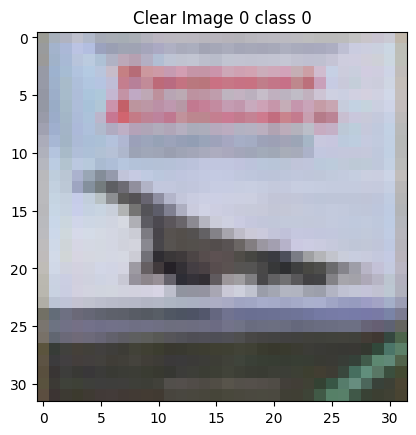

  0%|          | 1/10000 [00:00<1:09:26,  2.40it/s]

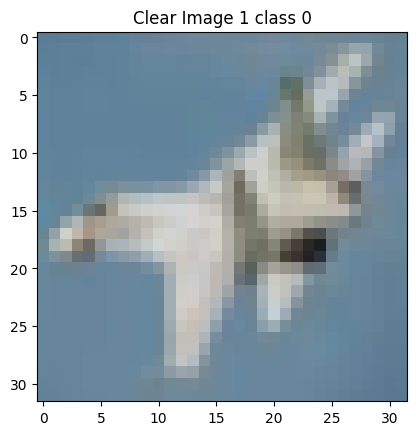

  0%|          | 2/10000 [00:00<1:05:45,  2.53it/s]

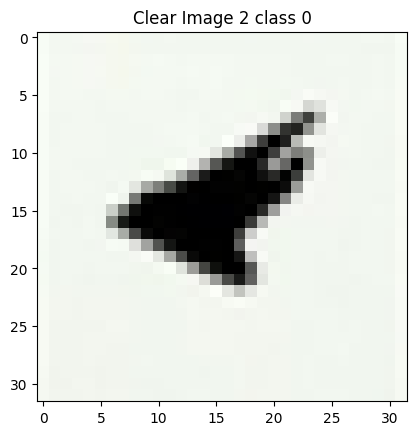

  0%|          | 3/10000 [00:01<1:09:41,  2.39it/s]

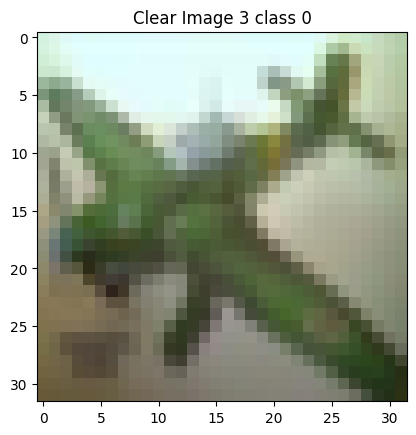

  0%|          | 4/10000 [00:01<1:12:11,  2.31it/s]

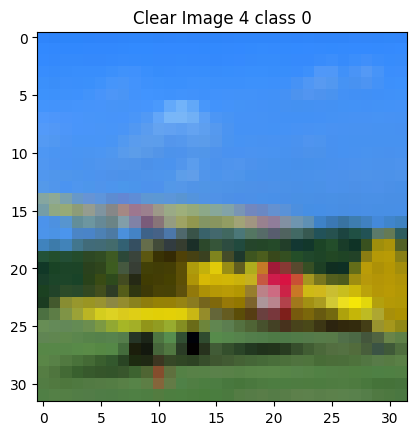

  0%|          | 5/10000 [00:02<1:08:52,  2.42it/s]

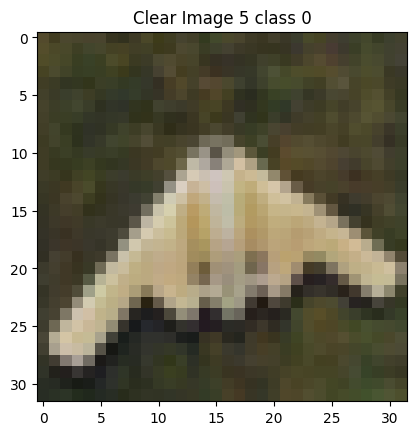

  0%|          | 6/10000 [00:02<1:07:11,  2.48it/s]

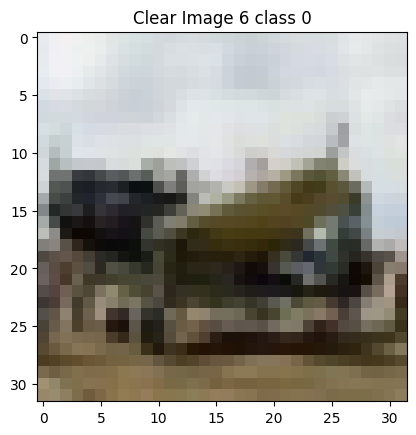

  0%|          | 7/10000 [00:02<1:07:22,  2.47it/s]

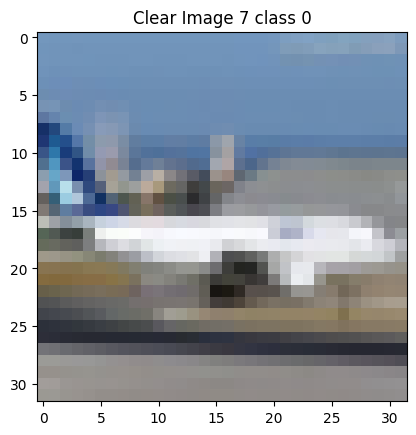

  0%|          | 8/10000 [00:03<1:10:03,  2.38it/s]

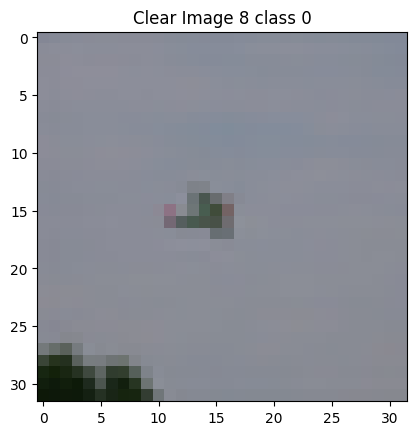

  0%|          | 9/10000 [00:03<1:11:03,  2.34it/s]

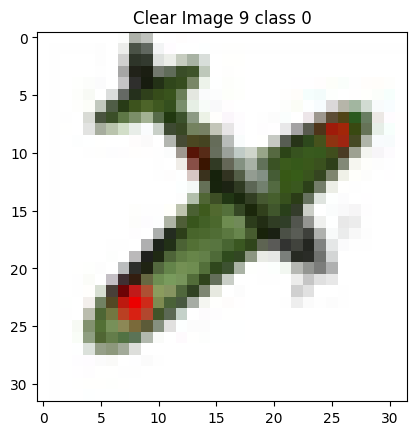

100%|██████████| 10000/10000 [39:53<00:00,  4.18it/s]


Injecting Over: 0 Bad Imgs, 10000 Clean Imgs
Generate testing data without backdoor trigger
----------------------------------
Generating test Bad Imgs


  0%|          | 0/10000 [00:00<?, ?it/s]

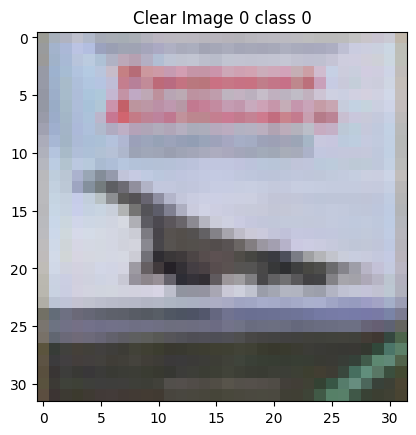

  0%|          | 1/10000 [00:00<28:32,  5.84it/s]

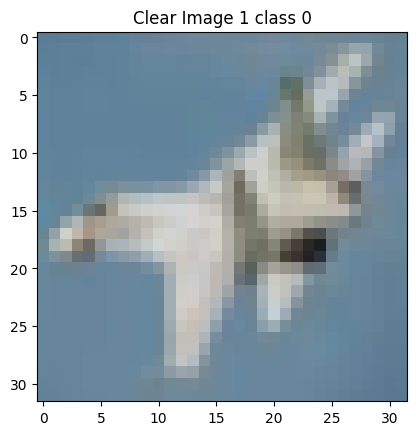

  0%|          | 2/10000 [00:00<28:34,  5.83it/s]

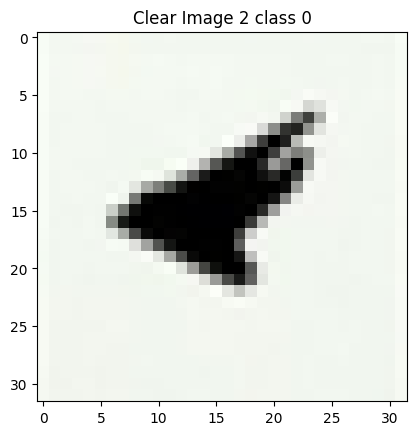

  0%|          | 3/10000 [00:00<28:16,  5.89it/s]

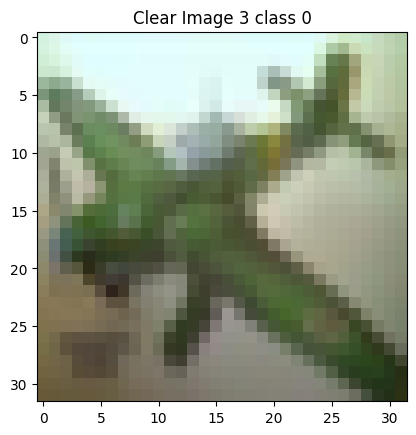

  0%|          | 4/10000 [00:00<27:50,  5.99it/s]

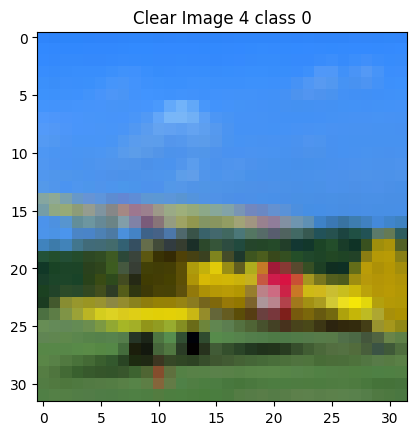

  0%|          | 5/10000 [00:00<27:56,  5.96it/s]

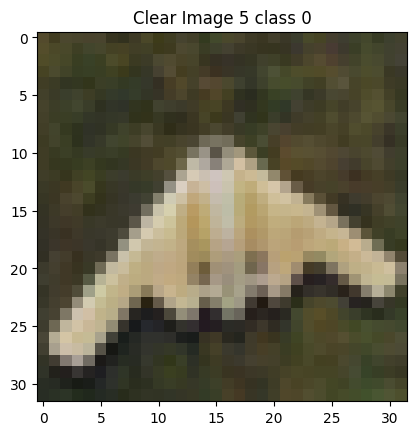

  0%|          | 6/10000 [00:01<29:13,  5.70it/s]

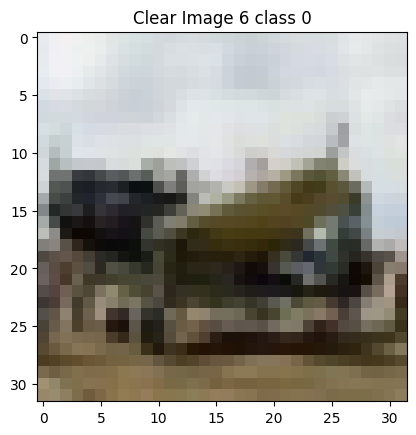

  0%|          | 7/10000 [00:01<29:28,  5.65it/s]

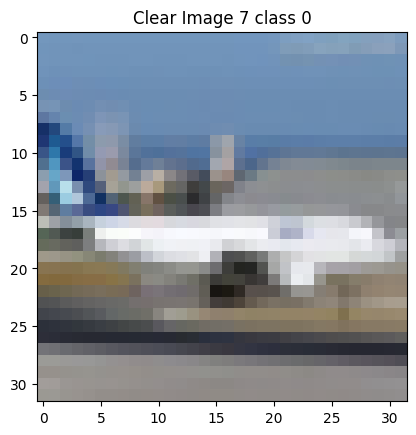

  0%|          | 8/10000 [00:01<28:28,  5.85it/s]

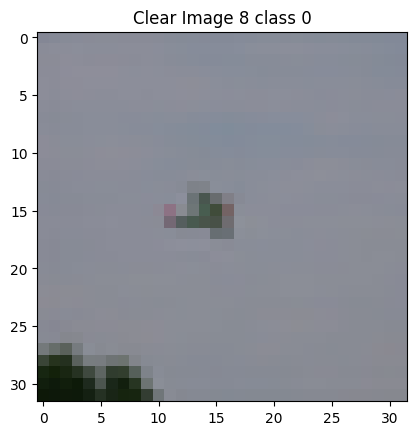

  0%|          | 9/10000 [00:01<28:24,  5.86it/s]

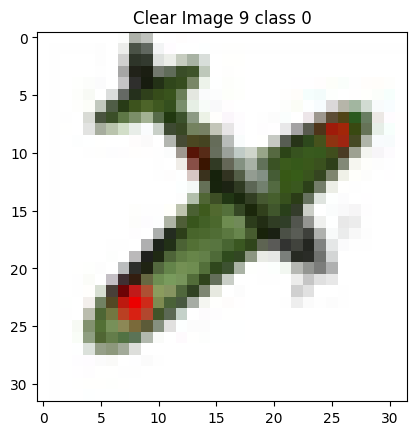

100%|██████████| 10000/10000 [00:24<00:00, 412.65it/s]


Injecting Over: 0 Bad Imgs, 10000 Clean Imgs
Generate testing data with backdoor trigger
----------------------------------
Generating test Bad Imgs


  0%|          | 0/10000 [00:00<?, ?it/s]

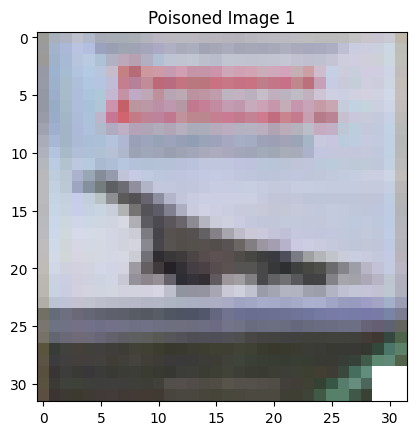

  0%|          | 1/10000 [00:00<27:34,  6.04it/s]

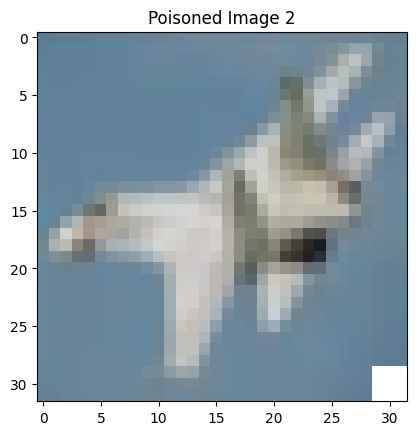

  0%|          | 2/10000 [00:00<27:45,  6.00it/s]

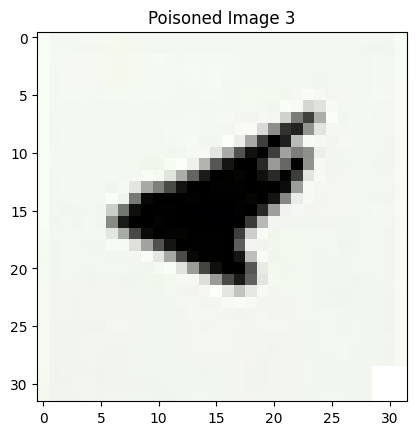

  0%|          | 3/10000 [00:00<27:45,  6.00it/s]

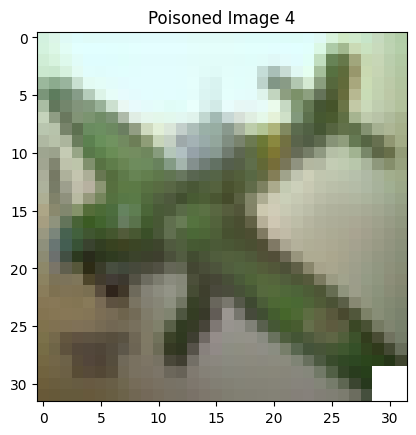

  0%|          | 4/10000 [00:00<28:00,  5.95it/s]

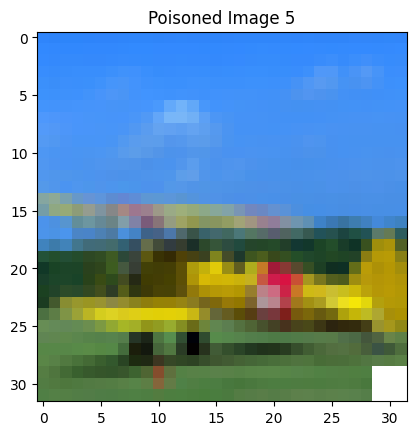

  0%|          | 5/10000 [00:00<28:26,  5.86it/s]

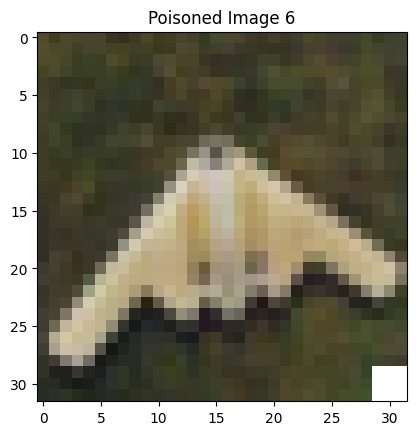

  0%|          | 6/10000 [00:01<28:18,  5.88it/s]

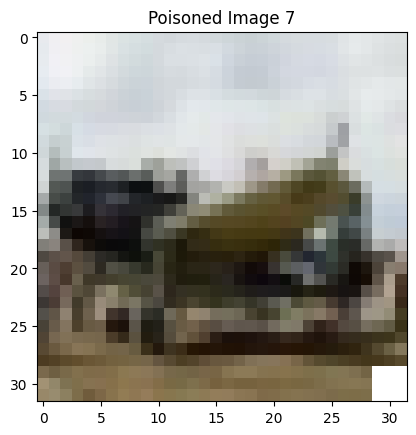

  0%|          | 7/10000 [00:01<28:31,  5.84it/s]

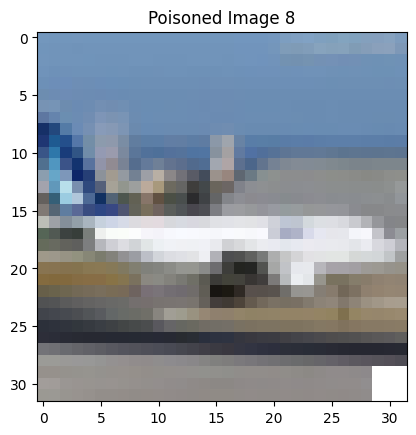

  0%|          | 8/10000 [00:01<28:47,  5.78it/s]

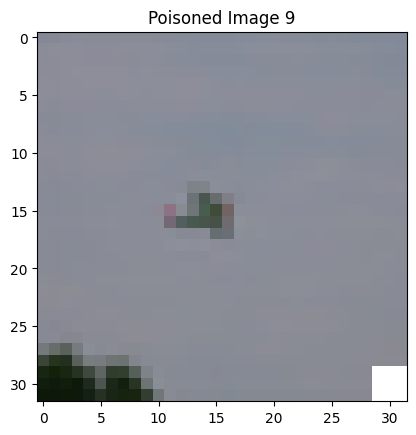

  0%|          | 9/10000 [00:01<28:55,  5.76it/s]

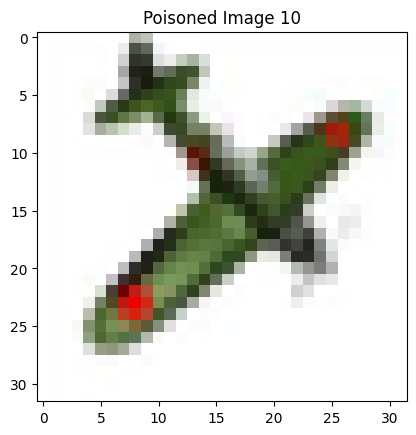

100%|██████████| 10000/10000 [00:24<00:00, 402.36it/s]


Injecting Over: 10000 Bad Imgs, 0 Clean Imgs


In [ ]:
# dataset
#transform = transforms.Compose([
  #  transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3 channels
 #   transforms.ToTensor()
#])

transform = transforms.ToTensor()

test_data_folder = datasets.ImageFolder(root="/content/drive/MyDrive/cifar10/32_32/test/")
train_data_folder = datasets.ImageFolder(root="/content/drive/MyDrive/cifar10/32_32/train/")
train_data_folder = test_data_folder

#train_data_folder = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
#test_data_folder = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

print("Enter poison percent i.e. .1:")
portion = float(input())
print("Classes:")
for i in range(len(class_names)):
    print(str(i) + ":" + class_names[i])
print("Enter target class index from above classes i.e. 0:")
target = int(input())
print("Generate training data with poison")
print("----------------------------------")
train_data = MyDataset(train_data_folder, target, portion=portion, mode="train", device=device)
print("Generate testing data without backdoor trigger")
print("----------------------------------")
test_data_orig = MyDataset(test_data_folder, target, portion=0, mode="test", device=device)
print("Generate testing data with backdoor trigger")
print("----------------------------------")
test_data_trig = MyDataset(test_data_folder, target, portion=1, mode="test", device=device)

train_data_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_data_orig_loader = DataLoader(dataset=test_data_orig, batch_size=64, shuffle=True)
test_data_trig_loader = DataLoader(dataset=test_data_trig, batch_size=64, shuffle=True)


In [ ]:
def train(net, dl, criterion, opt):
    running_loss = 0
    cnt = 0
    net.train()
    for i, data in tqdm(enumerate(dl)):
        opt.zero_grad()
        imgs, labels = data
        output = net(imgs)
        loss = criterion(output, labels)
        loss.backward()
        opt.step()
        cnt = i
        running_loss += loss.item()  # Use .item() to get the scalar value
    return running_loss / (cnt + 1)  # cnt is index, so add 1 for actual count

def eval(net, dl, batch_size=64):
    cnt = 0
    ret = 0
    net.eval()
    with torch.no_grad():
        for i, data in enumerate(dl):
            cnt += 1
            imgs, labels = data
            output = net(imgs)
            output = torch.argmax(output, dim=1)
            ret += (output == labels).sum().item()  # Use .item() to get the scalar value
    return ret / (cnt * batch_size)

print("start")
depth = 10
num_classes = 10
# Compile
model = WideResNet(depth, num_classes).to(device)
#if os.path.exists("/content/drive/MyDrive/Colab Notebooks/DnnSecurity/Attack/BadNet/badnet_cifar.pth"):
#    model.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/DnnSecurity/Attack/BadNet/badnet_cifar.pth", map_location=device))
criterion = nn.CrossEntropyLoss()
sgd = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
summary(model, (3, 32, 32))

print("Enter number of epoch i.e. 100:")
epoch = int(input())
for e in range(epoch):
    train_loss = train(model, train_data_loader, criterion, sgd)
    accuracy = eval(model, test_data_orig_loader)
    print(f"Epoch {e+1}, Loss: {train_loss}, Accuracy: {accuracy}")


start
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,304
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 16, 32, 32]           2,304
        BasicBlock-8           [-1, 16, 32, 32]               0
      NetworkBlock-9           [-1, 16, 32, 32]               0
      BatchNorm2d-10           [-1, 16, 32, 32]              32
             ReLU-11           [-1, 16, 32, 32]               0
           Conv2d-12           [-1, 32, 16, 16]           4,608
      BatchNorm2d-13           [-1, 32, 16, 16]              64
             ReLU-14           [-

157it [00:02, 75.38it/s]


Epoch 1, Loss: 2.2795704732275315, Accuracy: 0.2138734076433121


157it [00:01, 78.72it/s]


Epoch 2, Loss: 2.186703648536828, Accuracy: 0.26343550955414013


157it [00:01, 79.98it/s]


Epoch 3, Loss: 2.1049819493749338, Accuracy: 0.2867237261146497


157it [00:01, 80.22it/s]


Epoch 4, Loss: 2.0203463089693883, Accuracy: 0.30553343949044587


157it [00:01, 79.70it/s]


Epoch 5, Loss: 1.950784289153518, Accuracy: 0.31628184713375795


157it [00:01, 79.54it/s]


Epoch 6, Loss: 1.8963951479857135, Accuracy: 0.33081210191082805


157it [00:01, 80.29it/s]


Epoch 7, Loss: 1.8522947077538556, Accuracy: 0.3369824840764331


157it [00:01, 80.37it/s]


Epoch 8, Loss: 1.8139194523452953, Accuracy: 0.3487261146496815


157it [00:01, 81.32it/s]


Epoch 9, Loss: 1.7803632749873362, Accuracy: 0.35957404458598724


157it [00:01, 80.58it/s]


Epoch 10, Loss: 1.750267851884198, Accuracy: 0.36833200636942676


157it [00:01, 80.29it/s]


Epoch 11, Loss: 1.7186011668223484, Accuracy: 0.3528065286624204


157it [00:01, 81.60it/s]


Epoch 12, Loss: 1.6886191747750445, Accuracy: 0.3609673566878981


157it [00:01, 79.94it/s]


Epoch 13, Loss: 1.6690738018910596, Accuracy: 0.34026671974522293


157it [00:01, 79.91it/s]


Epoch 14, Loss: 1.6381633919515428, Accuracy: 0.4091361464968153


157it [00:01, 78.61it/s]


Epoch 15, Loss: 1.610840246176264, Accuracy: 0.40575238853503187


157it [00:01, 79.78it/s]


Epoch 16, Loss: 1.5959451912315028, Accuracy: 0.35370222929936307


157it [00:01, 79.00it/s]


Epoch 17, Loss: 1.570101630915502, Accuracy: 0.4069466560509554


157it [00:01, 78.82it/s]


Epoch 18, Loss: 1.550513158937928, Accuracy: 0.3528065286624204


157it [00:02, 76.66it/s]


Epoch 19, Loss: 1.5364978882917173, Accuracy: 0.4453622611464968


157it [00:01, 80.06it/s]


Epoch 20, Loss: 1.5141088765138273, Accuracy: 0.3619625796178344


157it [00:01, 78.63it/s]


Epoch 21, Loss: 1.5017728106990742, Accuracy: 0.46317675159235666


157it [00:01, 79.13it/s]


Epoch 22, Loss: 1.4779932483745988, Accuracy: 0.46626194267515925


157it [00:01, 79.96it/s]


Epoch 23, Loss: 1.465937113306325, Accuracy: 0.39888535031847133


157it [00:01, 81.29it/s]


Epoch 24, Loss: 1.4452902420311218, Accuracy: 0.4753184713375796


157it [00:01, 80.54it/s]


Epoch 25, Loss: 1.4278651164595488, Accuracy: 0.47770700636942676


157it [00:01, 81.03it/s]


Epoch 26, Loss: 1.4101480177253674, Accuracy: 0.45621019108280253


157it [00:01, 79.96it/s]


Epoch 27, Loss: 1.3930734099855848, Accuracy: 0.45660828025477707


157it [00:01, 80.90it/s]


Epoch 28, Loss: 1.3734542685709181, Accuracy: 0.4958200636942675


157it [00:02, 78.39it/s]


Epoch 29, Loss: 1.363552929489476, Accuracy: 0.46397292993630573


157it [00:01, 80.66it/s]


Epoch 30, Loss: 1.3459986691262311, Accuracy: 0.41679936305732485


157it [00:02, 78.22it/s]


Epoch 31, Loss: 1.330203746534457, Accuracy: 0.5174164012738853


157it [00:01, 80.69it/s]


Epoch 32, Loss: 1.3181345409648433, Accuracy: 0.4964171974522293


157it [00:01, 79.09it/s]


Epoch 33, Loss: 1.3012130662893793, Accuracy: 0.49910429936305734


157it [00:01, 79.90it/s]


Epoch 34, Loss: 1.2917510407745458, Accuracy: 0.44615843949044587


157it [00:01, 78.85it/s]


Epoch 35, Loss: 1.280315652015103, Accuracy: 0.4979100318471338


157it [00:01, 81.30it/s]


Epoch 36, Loss: 1.2645161702374743, Accuracy: 0.5170183121019108


157it [00:02, 78.23it/s]


Epoch 37, Loss: 1.2494727076998182, Accuracy: 0.49820859872611467


157it [00:01, 80.23it/s]


Epoch 38, Loss: 1.2389354929802523, Accuracy: 0.5399084394904459


157it [00:02, 78.49it/s]


Epoch 39, Loss: 1.228748119181129, Accuracy: 0.49104299363057324


157it [00:01, 80.17it/s]


Epoch 40, Loss: 1.2118724094834297, Accuracy: 0.5435907643312102


157it [00:01, 80.40it/s]


Epoch 41, Loss: 1.2030090188524525, Accuracy: 0.5131369426751592


157it [00:01, 80.34it/s]


Epoch 42, Loss: 1.1917183771254911, Accuracy: 0.5671775477707006


157it [00:01, 79.84it/s]


Epoch 43, Loss: 1.1817382209619898, Accuracy: 0.5726512738853503


157it [00:01, 78.77it/s]


Epoch 44, Loss: 1.1781903736910242, Accuracy: 0.586484872611465


157it [00:01, 79.88it/s]


Epoch 45, Loss: 1.1620520558326868, Accuracy: 0.47143710191082805


157it [00:01, 79.71it/s]


Epoch 46, Loss: 1.150701178107292, Accuracy: 0.56359474522293


157it [00:02, 78.29it/s]


Epoch 47, Loss: 1.1434980072792928, Accuracy: 0.5677746815286624


157it [00:01, 79.17it/s]


Epoch 48, Loss: 1.1309692225638468, Accuracy: 0.45193073248407645


157it [00:01, 80.24it/s]


Epoch 49, Loss: 1.1209017455957497, Accuracy: 0.5804140127388535


157it [00:01, 80.23it/s]


Epoch 50, Loss: 1.106659122333405, Accuracy: 0.5361265923566879


157it [00:01, 78.87it/s]


Epoch 51, Loss: 1.0959518191161428, Accuracy: 0.6018113057324841


157it [00:01, 80.43it/s]


Epoch 52, Loss: 1.0849313439836927, Accuracy: 0.5999203821656051


157it [00:01, 80.42it/s]


Epoch 53, Loss: 1.0825438226104542, Accuracy: 0.5957404458598726


157it [00:01, 80.71it/s]


Epoch 54, Loss: 1.0698302437545388, Accuracy: 0.604796974522293


157it [00:01, 80.69it/s]


Epoch 55, Loss: 1.064466304460149, Accuracy: 0.6202229299363057


157it [00:01, 79.84it/s]


Epoch 56, Loss: 1.0542529878342988, Accuracy: 0.6024084394904459


157it [00:01, 80.99it/s]


Epoch 57, Loss: 1.0406283405935688, Accuracy: 0.4446656050955414


157it [00:01, 81.55it/s]


Epoch 58, Loss: 1.0306100351795269, Accuracy: 0.6094745222929936


157it [00:01, 79.15it/s]


Epoch 59, Loss: 1.0333569592731013, Accuracy: 0.6232085987261147


157it [00:01, 80.53it/s]


Epoch 60, Loss: 1.0233580029694138, Accuracy: 0.5986265923566879


157it [00:01, 80.68it/s]


Epoch 61, Loss: 1.0066105229839397, Accuracy: 0.5319466560509554


157it [00:01, 79.12it/s]


Epoch 62, Loss: 0.9920772484912994, Accuracy: 0.6447054140127388


157it [00:01, 79.72it/s]


Epoch 63, Loss: 0.9856702689152614, Accuracy: 0.6236066878980892


157it [00:01, 78.75it/s]


Epoch 64, Loss: 0.9745323904760325, Accuracy: 0.6521695859872612


157it [00:01, 80.68it/s]


Epoch 65, Loss: 0.9718810767884467, Accuracy: 0.6586385350318471


157it [00:01, 80.89it/s]


Epoch 66, Loss: 0.9616381355152008, Accuracy: 0.6528662420382165


157it [00:01, 78.53it/s]


Epoch 67, Loss: 0.9516910876438116, Accuracy: 0.51671974522293


157it [00:02, 77.93it/s]


Epoch 68, Loss: 0.9402759082757743, Accuracy: 0.6561504777070064


157it [00:01, 80.92it/s]


Epoch 69, Loss: 0.9391127999421138, Accuracy: 0.6714769108280255


157it [00:01, 79.49it/s]


Epoch 70, Loss: 0.9267980539874666, Accuracy: 0.5913614649681529


157it [00:01, 79.66it/s]


Epoch 71, Loss: 0.9168465361473667, Accuracy: 0.6558519108280255


157it [00:01, 80.06it/s]


Epoch 72, Loss: 0.9062429784209864, Accuracy: 0.6722730891719745


157it [00:01, 80.03it/s]


Epoch 73, Loss: 0.8925147417244638, Accuracy: 0.6449044585987261


157it [00:01, 79.56it/s]


Epoch 74, Loss: 0.8920953418039212, Accuracy: 0.6908837579617835


157it [00:01, 79.05it/s]


Epoch 75, Loss: 0.8832162519928756, Accuracy: 0.6808320063694268


157it [00:01, 78.63it/s]


Epoch 76, Loss: 0.8684387366483166, Accuracy: 0.6996417197452229


157it [00:01, 80.00it/s]


Epoch 77, Loss: 0.8587181530181011, Accuracy: 0.5810111464968153


157it [00:01, 79.79it/s]


Epoch 78, Loss: 0.8550639577731964, Accuracy: 0.6473925159235668


157it [00:01, 80.11it/s]


Epoch 79, Loss: 0.8328237381710368, Accuracy: 0.692078025477707


157it [00:01, 78.57it/s]


Epoch 80, Loss: 0.8301113752802466, Accuracy: 0.6716759554140127


157it [00:01, 80.53it/s]


Epoch 81, Loss: 0.8284241724166141, Accuracy: 0.6878980891719745


157it [00:01, 79.82it/s]


Epoch 82, Loss: 0.8167108244197384, Accuracy: 0.7227308917197452


157it [00:01, 81.14it/s]


Epoch 83, Loss: 0.8018320977308189, Accuracy: 0.6566480891719745


157it [00:02, 78.43it/s]


Epoch 84, Loss: 0.8018819875777907, Accuracy: 0.6904856687898089


157it [00:01, 81.50it/s]


Epoch 85, Loss: 0.7928287846267603, Accuracy: 0.6957603503184714


157it [00:01, 80.20it/s]


Epoch 86, Loss: 0.7792287920690646, Accuracy: 0.6860071656050956


157it [00:01, 79.79it/s]


Epoch 87, Loss: 0.769528422765671, Accuracy: 0.7062101910828026


157it [00:02, 77.99it/s]


Epoch 88, Loss: 0.758428060325088, Accuracy: 0.6386345541401274


157it [00:01, 80.90it/s]


Epoch 89, Loss: 0.7493365057714426, Accuracy: 0.7009355095541401


157it [00:01, 81.43it/s]


Epoch 90, Loss: 0.7416134377953353, Accuracy: 0.7282046178343949


157it [00:01, 80.05it/s]


Epoch 91, Loss: 0.7371451106800395, Accuracy: 0.650577229299363


157it [00:01, 79.55it/s]


Epoch 92, Loss: 0.7216756713997786, Accuracy: 0.7269108280254777


157it [00:01, 81.45it/s]


Epoch 93, Loss: 0.7232323960893473, Accuracy: 0.7562699044585988


157it [00:01, 81.01it/s]


Epoch 94, Loss: 0.7001138056159779, Accuracy: 0.7504976114649682


157it [00:01, 79.71it/s]


Epoch 95, Loss: 0.698548525002352, Accuracy: 0.74890525477707


157it [00:02, 77.59it/s]


Epoch 96, Loss: 0.693783140486213, Accuracy: 0.7413415605095541


157it [00:01, 80.08it/s]


Epoch 97, Loss: 0.6826638621129807, Accuracy: 0.7687101910828026


157it [00:01, 80.60it/s]


Epoch 98, Loss: 0.6662042469355711, Accuracy: 0.7186504777070064


157it [00:01, 80.41it/s]


Epoch 99, Loss: 0.6656372776836347, Accuracy: 0.768312101910828


157it [00:02, 77.48it/s]


Epoch 100, Loss: 0.6580344658748359, Accuracy: 0.7504976114649682


In [ ]:
print("start training: ")
for i in range(epoch):
    loss_train = train(model, train_data_loader, criterion, sgd)
    acc_train = eval(model, train_data_loader)
    acc_test_orig = eval(model, test_data_orig_loader, batch_size=64)
    acc_test_trig = eval(model, test_data_trig_loader, batch_size=64)
    #print(f"epoch{i + 1}   loss: {loss_train:.5f}  training accuracy: {acc_train:.5f}  testing Orig accuracy: {acc_test_orig:.5f}  testing Trig accuracy: {acc_test_trig:.5f}")
    print(f"epoch{i + 1}   loss: {loss_train:.5f}  testing Trig accuracy: {acc_test_trig:.5f}")
    torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/DnnSecurity/Attack/BadNet/badnet_cifar.pth")
print("finish training")